## import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from imblearn.over_sampling import ADASYN, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

ModuleNotFoundError: No module named 'imblearn'

## Load data

In [192]:
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli.csv")

## Distribusi Data

DATA AWAL ECOLI DATASET
Jumlah data: 336
Jumlah fitur: 7
Jumlah kelas: 8


Preview data (5 baris pertama):
         name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


Statistik deskriptif data:
              mcg         gvh         lip         chg         aac        alm1  \
count  336.000000  336.000000  336.000000  336.000000  336.000000  336.000000   
mean     0.500060    0.500000    0.495476    0.501488    0.500030    0.500179   
std      0.194634    0.148157    0.088495    0.027277    0.122376    0.215751   
min      0.000000    0.160000    0.480000    0.500000    0.000000    0.030000   
25%      0.340000    0.400000    0.480000    0.500000    0.420000    0.330000   
50%      0.5

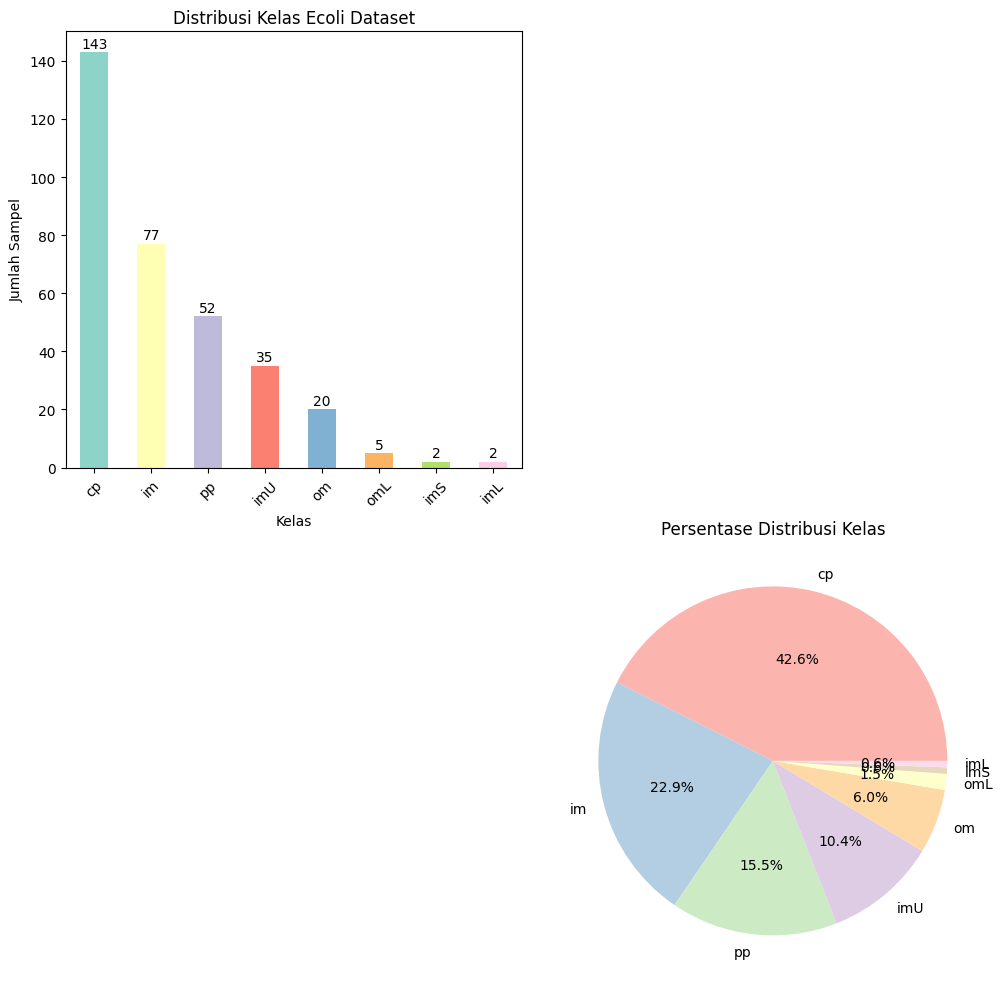

In [193]:
# 2. Tampilkan data awal dalam bentuk tabel
print("=" * 60)
print("DATA AWAL ECOLI DATASET")
print("=" * 60)
print(f"Jumlah data: {len(df)}")
print(f"Jumlah fitur: {len(df.columns) - 2}")  # excluding name and class
print(f"Jumlah kelas: {df['class'].nunique()}")
print("\n")

# Tampilkan preview data
print("Preview data (5 baris pertama):")
print(df.head())
print("\n")

# Tampilkan informasi statistik
print("Statistik deskriptif data:")
print(df.drop(columns=['name', 'class']).describe())
print("\n")

# Tampilkan distribusi kelas
print("Distribusi kelas:")
class_distribution = df['class'].value_counts()
print(class_distribution)
print("\n")

# 3. Visualisasi data awal
plt.figure(figsize=(15, 10))

# Subplot 1: Distribusi kelas (Bar plot)
plt.subplot(2, 3, 1)
class_distribution.plot(kind='bar', color=plt.cm.Set3(np.arange(len(class_distribution))))
plt.title('Distribusi Kelas Ecoli Dataset')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
for i, v in enumerate(class_distribution):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Subplot 2: Pie chart distribusi kelas
plt.subplot(2, 3, 5)
plt.pie(class_distribution.values, labels=class_distribution.index, 
        autopct='%1.1f%%', colors=plt.cm.Pastel1(np.arange(len(class_distribution))))
plt.title('Persentase Distribusi Kelas')


plt.tight_layout()
plt.show()

pisahkan fitur dan label

In [194]:
X = df.drop(columns=["name", "class"])
y = df["class"]

## Penyeimbangan data menggunakan ADASYN

In [195]:
print("Distribusi kelas sebelum ADASYN:")
print(f"{sorted(Counter(y).items())}")

nt = X
ns = y
class_counts = Counter(y)
temp = sorted(class_counts.values())  
print(f"Sorted counts untuk iterasi: {temp}")

for i in range(0, 7):
    n = max(1, temp[i] - 1)  
    
    print(f"\nIterasi {i+1}: menggunakan k_neighbors={n}")
    
    try:
        nt, ns = ADASYN(n_neighbors=n, sampling_strategy='minority').fit_resample(nt, ns)
        print(f"Hasil iterasi {i+1}: {sorted(Counter(ns).items())}")
    except Exception as e:
        print(f"Error pada iterasi {i+1}: {e}")
        break

print(f"\nDistribusi kelas setelah ADASYN:")
print(f"{sorted(Counter(ns).items())}")

print(f"\nTotal samples sebelum: {len(y)}")
print(f"Total samples setelah: {len(ns)}")
print(f"Data yang ditambahkan: {len(ns) - len(y)}")

Distribusi kelas sebelum ADASYN:
[('cp', 143), ('im', 77), ('imL', 2), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]
Sorted counts untuk iterasi: [2, 2, 5, 20, 35, 52, 77, 143]

Iterasi 1: menggunakan k_neighbors=1
Hasil iterasi 1: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 2), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 2: menggunakan k_neighbors=1
Hasil iterasi 2: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 5), ('pp', 52)]

Iterasi 3: menggunakan k_neighbors=4
Hasil iterasi 3: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 20), ('omL', 143), ('pp', 52)]

Iterasi 4: menggunakan k_neighbors=19
Hasil iterasi 4: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 35), ('om', 143), ('omL', 143), ('pp', 52)]

Iterasi 5: menggunakan k_neighbors=34
Hasil iterasi 5: [('cp', 143), ('im', 77), ('imL', 142), ('imS', 142), ('imU', 146), ('om', 143), ('omL', 143), ('pp', 52)]

Iterasi 

## Diagram sebelum dan sesudah ADASYN

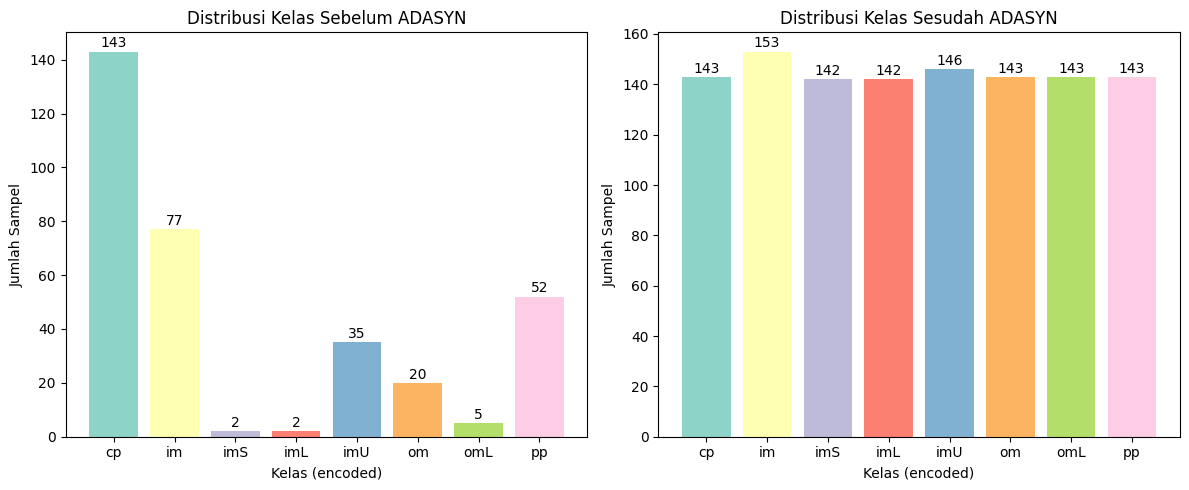

In [196]:
class_distribution_before = class_counts
class_distribution_after = Counter(ns)
# 4. Visualisasi diagram batang
plt.figure(figsize=(12, 5))

# Sebelum ADASYN
plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.keys(),
        class_distribution_before.values(),
        color=plt.cm.Set3(np.arange(len(class_distribution_before))))
plt.title("Distribusi Kelas Sebelum ADASYN")
plt.xlabel("Kelas (encoded)")
plt.ylabel("Jumlah Sampel")
for i, (k, v) in enumerate(class_distribution_before.items()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Sesudah ADASYN
plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.keys(),
        class_distribution_after.values(),
        color=plt.cm.Set3(np.arange(len(class_distribution_after))))
plt.title("Distribusi Kelas Sesudah ADASYN")
plt.xlabel("Kelas (encoded)")
plt.ylabel("Jumlah Sampel")
for i, (k, v) in enumerate(class_distribution_after.items()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Menggunkan SMOTE

In [197]:
class_distribution_before = df['class'].value_counts()

smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

class_distribution_after = Counter(y_resampled_smote)

print("✅ SMOTE berhasil")
print("Sebelum:", class_distribution_before)
print("Sesudah:", class_distribution_after)

✅ SMOTE berhasil
Sebelum: class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64
Sesudah: Counter({'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})


## Diagram sebelum dan sesudah SMOTE

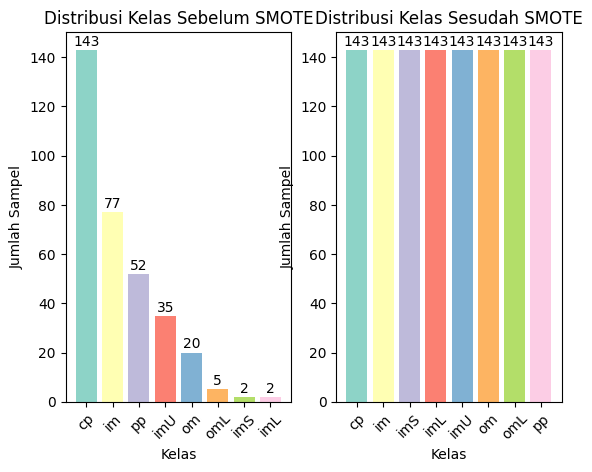

In [198]:
# Subplot 1: Sebelum SMOTE
plt.subplot(1, 2, 1)
plt.bar(class_distribution_before.index,
        class_distribution_before.values,
        color=plt.cm.Set3(np.arange(len(class_distribution_before))))
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
for i, (k, v) in enumerate(class_distribution_before.items()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

# Subplot 2: Sesudah SMOTE
plt.subplot(1, 2, 2)
plt.bar(class_distribution_after.keys(),
        class_distribution_after.values(),
        color=plt.cm.Set3(np.arange(len(class_distribution_after))))
plt.title('Distribusi Kelas Sesudah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
for i, (k, v) in enumerate(class_distribution_after.items()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')


## Klasifikasi Data asli menggunakan Naive bayes

Accuracy: 0.7920792079207921

Classification Report:
               precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.75      0.65      0.70        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.62      0.50      0.56        10
          om       0.00      0.00      0.00         6
         omL       0.50      1.00      0.67         1
          pp       0.67      1.00      0.80        16

    accuracy                           0.79       101
   macro avg       0.43      0.52      0.46       101
weighted avg       0.73      0.79      0.75       101



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

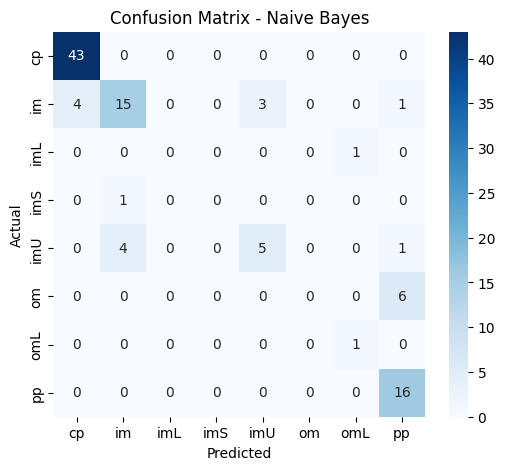

In [199]:
#load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli.csv")
# 1. Split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# 2. Inisialisasi model
nb = GaussianNB()

# 3. Latih model
nb.fit(X_train, y_train)

# 4. Prediksi
y_pred = nb.predict(X_test)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## Bagging menggunakan Naive Bayes estimator

In [200]:
bagging_nb_asli = BaggingClassifier(
    estimator=nb,       
    n_estimators=100,        
    max_samples=0.8,         
    max_features=1.0,        
    random_state=42,
    n_jobs=-1
)

bagging_nb_asli.fit(X_train, y_train)

# --- 4. Evaluasi ---
y_pred_bag = bagging_nb_asli.predict(X_test)

print("\n✅ Evaluasi Bagging + ADASYN + Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag))


✅ Evaluasi Bagging + ADASYN + Naive Bayes:
Accuracy: 0.8514851485148515

Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 4 16  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  5  0  0  5  0  0  0]
 [ 0  0  0  0  0  5  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 16]]

Classification Report:
               precision    recall  f1-score   support

          cp       0.91      1.00      0.96        43
          im       0.73      0.70      0.71        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.62      0.50      0.56        10
          om       1.00      0.83      0.91         6
         omL       0.50      1.00      0.67         1
          pp       0.94      1.00      0.97        16

    accuracy                           0.85       101
   macro avg       0.59      0.63      0.60       101
weighted avg       0.83      0.85      0.84       101



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Visualisasi akurasi SMOTE sebelum dan sesudah di bagging

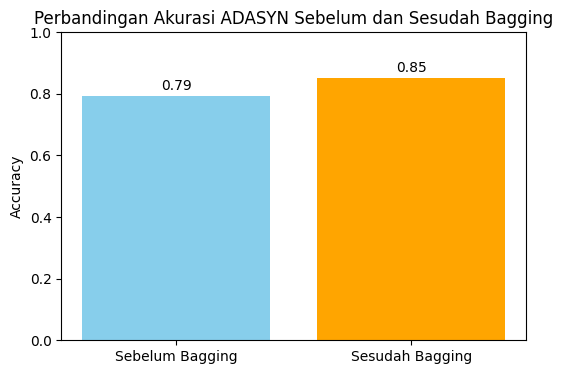

In [201]:
acc_no_bagging_nb = accuracy_score(y_test, y_pred)
acc_bagging_nb = accuracy_score(y_test, y_pred_bag)      

# --- Simpan dalam dict ---
akurasi = {
    "Sebelum Bagging": acc_no_bagging_nb,
    "Sesudah Bagging": acc_bagging_nb
    
}

# --- Visualisasi diagram batang ---
plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.title("Perbandingan Akurasi ADASYN Sebelum dan Sesudah Bagging")
for i, v in enumerate(akurasi.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) 

plt.show()

## Klasifikasi ADASYN Menggunakan Naive Bayes

Accuracy: 0.8097982708933718

Classification Report:
               precision    recall  f1-score   support

          cp       0.88      1.00      0.93        43
          im       0.88      0.50      0.64        46
         imL       1.00      1.00      1.00        43
         imS       0.95      1.00      0.98        42
         imU       0.73      0.73      0.73        44
          om       0.93      0.30      0.46        43
         omL       1.00      1.00      1.00        43
          pp       0.50      0.98      0.66        43

    accuracy                           0.81       347
   macro avg       0.86      0.81      0.80       347
weighted avg       0.86      0.81      0.80       347



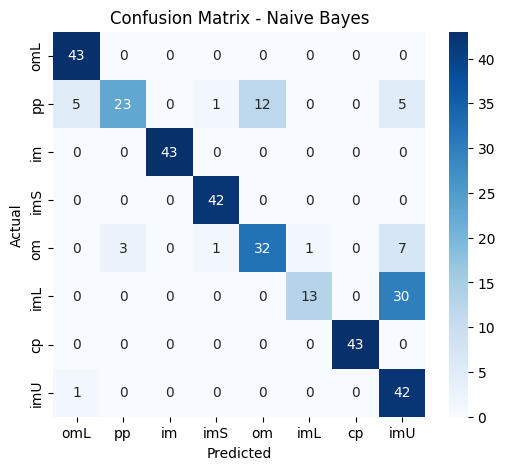

In [202]:
#load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli_adasyn.csv")
# 1. Split data (pakai hasil ADASYN)
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    nt, ns, test_size=0.3, random_state=42, stratify=ns
)

# 2. Inisialisasi model
nb = GaussianNB()

# 3. Latih model
nb.fit(X_train_adasyn, y_train_adasyn)

# 4. Prediksi
y_pred_adasyn = nb.predict(X_test_adasyn)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test_adasyn, y_pred_adasyn))
print("\nClassification Report:\n", classification_report(y_test_adasyn, y_pred_adasyn))

# 6. Confusion Matrix
cm = confusion_matrix(y_test_adasyn, y_pred_adasyn)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(ns), yticklabels=set(ns))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## Bagging menggunakan Naive Bayes estimator

In [203]:
bagging_nb_adasyn = BaggingClassifier(
    estimator=nb,       
    n_estimators=100,        
    max_samples=0.8,         
    max_features=1.0,        
    random_state=42,
    n_jobs=-1
)

bagging_nb_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn_bag = bagging_nb_adasyn.predict(X_test_adasyn)

print("\n✅ Evaluasi Bagging + ADASYN + Naive Bayes:")
print("Accuracy:", accuracy_score(y_test_adasyn, y_pred_adasyn_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_adasyn, y_pred_adasyn_bag))
print("\nClassification Report:\n", classification_report(y_test_adasyn, y_pred_adasyn_bag))


✅ Evaluasi Bagging + ADASYN + Naive Bayes:
Accuracy: 0.8097982708933718

Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 5 22  0  1 13  0  0  5]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0]
 [ 0  4  0  1 33  0  0  6]
 [ 0  0  0  0  0 13  0 30]
 [ 0  0  0  0  0  0 43  0]
 [ 1  0  0  0  0  0  0 42]]

Classification Report:
               precision    recall  f1-score   support

          cp       0.88      1.00      0.93        43
          im       0.85      0.48      0.61        46
         imL       1.00      1.00      1.00        43
         imS       0.95      1.00      0.98        42
         imU       0.72      0.75      0.73        44
          om       1.00      0.30      0.46        43
         omL       1.00      1.00      1.00        43
          pp       0.51      0.98      0.67        43

    accuracy                           0.81       347
   macro avg       0.86      0.81      0.80       347
weighted avg       0.86      0.81      0.80       347



## Visualisasi akurasi SMOTE sebelum dan sesudah di bagging

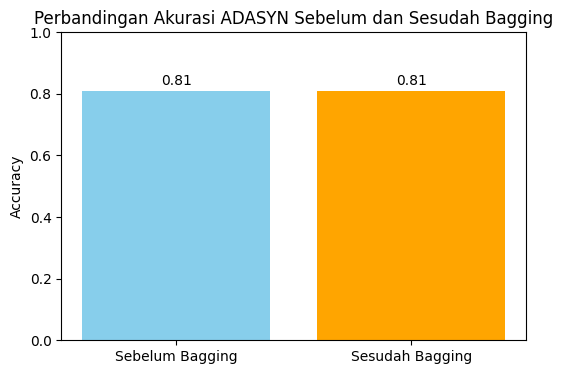

In [204]:
acc_no_bagging_adasyn_nb = accuracy_score(y_test_adasyn, y_pred_adasyn)
acc_bagging_adasyn_nb = accuracy_score(y_test_adasyn, y_pred_adasyn_bag)      

# --- Simpan dalam dict ---
akurasi = {
    "Sebelum Bagging": acc_no_bagging_adasyn_nb,
    "Sesudah Bagging": acc_bagging_adasyn_nb
    
}

# --- Visualisasi diagram batang ---
plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.title("Perbandingan Akurasi ADASYN Sebelum dan Sesudah Bagging")
for i, v in enumerate(akurasi.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) 

plt.show()

## Klasifikasi SMOTE menggunakan Naive Bayes

Accuracy: 0.8197674418604651

Classification Report:
               precision    recall  f1-score   support

          cp       0.84      1.00      0.91        43
          im       0.84      0.49      0.62        43
         imL       1.00      1.00      1.00        43
         imS       0.98      1.00      0.99        43
         imU       0.74      0.72      0.73        43
          om       1.00      0.40      0.57        43
         omL       1.00      1.00      1.00        43
          pp       0.52      0.95      0.67        43

    accuracy                           0.82       344
   macro avg       0.86      0.82      0.81       344
weighted avg       0.86      0.82      0.81       344



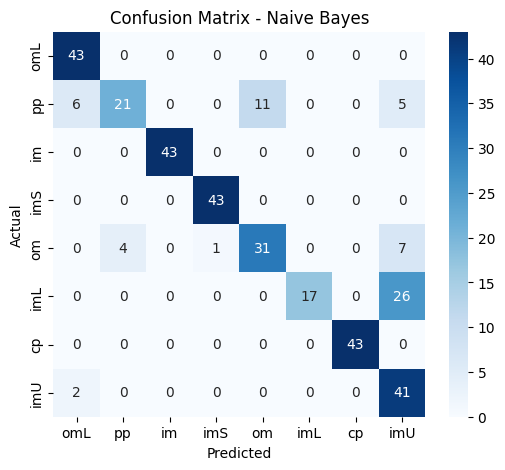

In [205]:
# load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli_smote.csv")
#  Split data (pakai hasil SMOTE)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42, stratify=y_resampled_smote
)

# 2. Inisialisasi model
nb = GaussianNB()

# 3. Latih model
nb.fit(X_train_smote, y_train_smote)

# 4. Prediksi
y_pred_smote = nb.predict(X_test_smote)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))

# 6. Confusion Matrix
cm = confusion_matrix(y_test_smote, y_pred_smote)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_resampled_smote), yticklabels=set(y_resampled_smote))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## Bagging menggunakan Naive Bayes estimator

In [206]:
bagging_nb_smote = BaggingClassifier(
    estimator=nb,       
    n_estimators=100,        
    max_samples=0.8,         
    max_features=1.0,        
    random_state=42,
    n_jobs=-1
)

bagging_nb_smote.fit(X_train_smote, y_train_smote)
y_pred_smote_bag = bagging_nb_smote.predict(X_test_smote)

print("\n✅ Evaluasi Bagging + ADASYN + Naive Bayes:")
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote_bag))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote_bag))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote_bag))


✅ Evaluasi Bagging + ADASYN + Naive Bayes:
Accuracy: 0.8517441860465116

Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 4 27  0  0 11  0  0  1]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 0  5  0  0 36  0  0  2]
 [ 0  0  0  0  0 17  0 26]
 [ 0  0  0  0  0  0 43  0]
 [ 2  0  0  0  0  0  0 41]]

Classification Report:
               precision    recall  f1-score   support

          cp       0.88      1.00      0.93        43
          im       0.84      0.63      0.72        43
         imL       1.00      1.00      1.00        43
         imS       1.00      1.00      1.00        43
         imU       0.77      0.84      0.80        43
          om       1.00      0.40      0.57        43
         omL       1.00      1.00      1.00        43
          pp       0.59      0.95      0.73        43

    accuracy                           0.85       344
   macro avg       0.88      0.85      0.84       344
weighted avg       0.88      0.85      0.84       344



## Visualisasi akurasi SMOTE sebelum dan sesudah di bagging

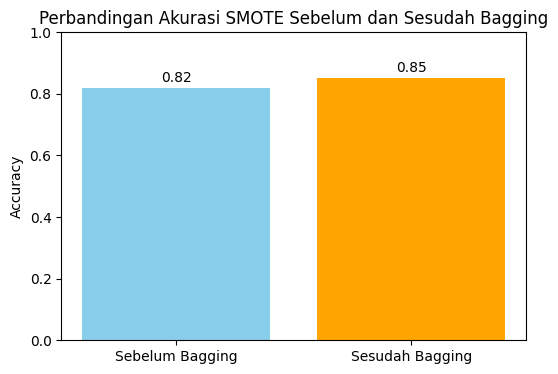

In [207]:
acc_no_bagging_smote_nb = accuracy_score(y_test_smote, y_pred_smote)
acc_bagging_smote_nb = accuracy_score(y_test_smote, y_pred_smote_bag)      

# --- Simpan dalam dict ---
akurasi = {
    "Sebelum Bagging": acc_no_bagging_smote_nb,
    "Sesudah Bagging": acc_bagging_smote_nb
    
}

# --- Visualisasi diagram batang ---
plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.title("Perbandingan Akurasi SMOTE Sebelum dan Sesudah Bagging")
for i, v in enumerate(akurasi.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) 

plt.show()

## Visualisasi Perbandingan akurasi menggunakan Naive Bayes

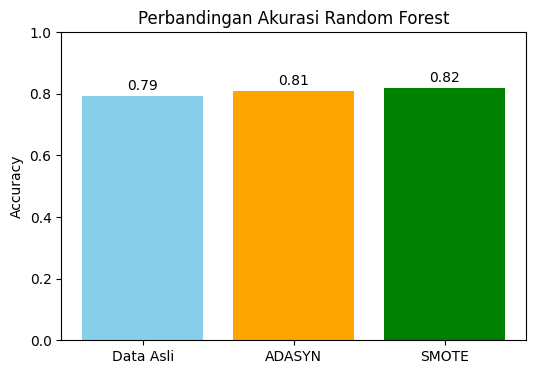

In [208]:
acc_asli_nb = accuracy_score(y_test, y_pred)      
acc_adasyn_nb = accuracy_score(y_test_adasyn, y_pred_adasyn)   
acc_smote_nb = accuracy_score(y_test_smote, y_pred_smote) 

# --- Simpan dalam dict ---
akurasi = {
    "Data Asli": acc_asli_nb,
    "ADASYN": acc_adasyn_nb,
    "SMOTE": acc_smote_nb
    
}

# --- Visualisasi diagram batang ---
plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.title("Perbandingan Akurasi Random Forest")
for i, v in enumerate(akurasi.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) 

plt.show()

## Klasifikasi Data asli menggunakan Random Forest

Accuracy: 0.8217821782178217

Classification Report:
               precision    recall  f1-score   support

          cp       0.93      1.00      0.97        43
          im       0.73      0.70      0.71        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.46      0.60      0.52        10
          om       1.00      0.83      0.91         6
         omL       0.50      1.00      0.67         1
          pp       0.92      0.75      0.83        16

    accuracy                           0.82       101
   macro avg       0.57      0.61      0.58       101
weighted avg       0.82      0.82      0.82       101



c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

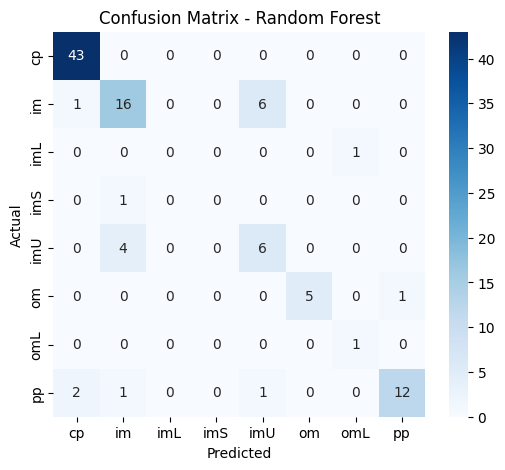

In [209]:
#load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli.csv")
# 1. Split data 
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# 2. Inisialisasi model Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=None,         
    random_state=42
)

# 3. Latih model
rf.fit(X_train1, y_train1)

# 4. Prediksi
y_pred1 = rf.predict(X_test1)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("\nClassification Report:\n", classification_report(y_test1, y_pred1))

# 6. Confusion Matrix
cm = confusion_matrix(y_test1, y_pred1)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Klasifikasi ADASYN Menggunakan Random Forest

Accuracy: 0.9510086455331412

Classification Report:
               precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.84      0.80      0.82        46
         imL       1.00      1.00      1.00        43
         imS       1.00      1.00      1.00        42
         imU       0.82      0.84      0.83        44
          om       1.00      1.00      1.00        43
         omL       1.00      1.00      1.00        43
          pp       1.00      0.98      0.99        43

    accuracy                           0.95       347
   macro avg       0.95      0.95      0.95       347
weighted avg       0.95      0.95      0.95       347



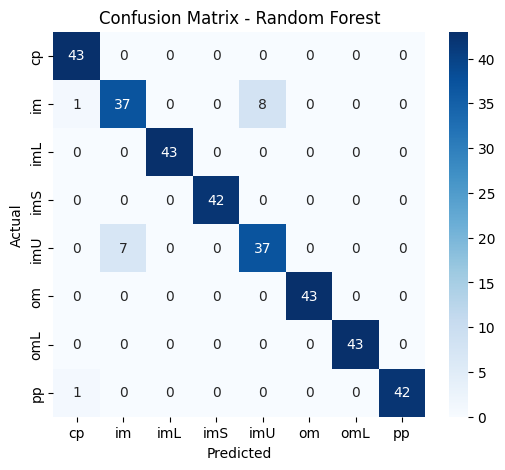

In [210]:
#load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli_adasyn.csv")
# 1. Split data (pakai hasil ADASYN)
X_train_adasyn1, X_test_adasyn1, y_train_adasyn1, y_test_adasyn1 = train_test_split(
    nt, ns, test_size=0.3, random_state=42, stratify=ns
)
# 2. Inisialisasi model Random Forest
rf = RandomForestClassifier(
    n_estimators=100,      
    max_depth=None,        
    random_state=42
)

# 3. Latih model
rf.fit(X_train_adasyn1, y_train_adasyn1)

# 4. Prediksi
y_pred_adasyn1 = rf.predict(X_test_adasyn1)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test_adasyn1, y_pred_adasyn1))
print("\nClassification Report:\n", classification_report(y_test_adasyn1, y_pred_adasyn1))

# 6. Confusion Matrix
cm = confusion_matrix(y_test_adasyn1, y_pred_adasyn1)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Klasifikasi SMOTE Menggunakan Random Forest

Accuracy: 0.9447674418604651

Classification Report:
               precision    recall  f1-score   support

          cp       0.88      1.00      0.93        43
          im       0.90      0.84      0.87        43
         imL       1.00      1.00      1.00        43
         imS       1.00      1.00      1.00        43
         imU       0.90      0.86      0.88        43
          om       1.00      0.88      0.94        43
         omL       1.00      1.00      1.00        43
          pp       0.89      0.98      0.93        43

    accuracy                           0.94       344
   macro avg       0.95      0.94      0.94       344
weighted avg       0.95      0.94      0.94       344



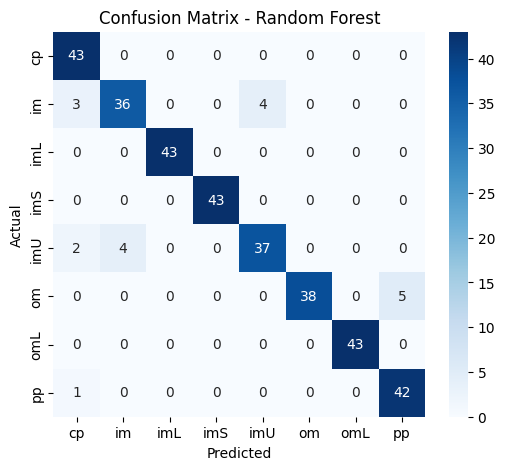

In [211]:
# load dataset
df = pd.read_csv(r"D:\KULIAH\SEMESTER 5\Program Saint Data\Tugas\2\ecoli\ecoli_smote.csv")
#  Split data (pakai hasil SMOTE)
X_train_smote1, X_test_smote1, y_train_smote1, y_test_smote1 = train_test_split(
    X_resampled_smote, y_resampled_smote, test_size=0.3, random_state=42, stratify=y_resampled_smote
)
# 2. Inisialisasi model Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=None,         
    random_state=42
)
# 3. Latih model
rf.fit(X_train_smote1, y_train_smote1)

# 4. Prediksi
y_pred_smote1 = rf.predict(X_test_smote1)

# 5. Evaluasi
print("Accuracy:", accuracy_score(y_test_smote1, y_pred_smote1))
print("\nClassification Report:\n", classification_report(y_test_smote1, y_pred_smote1))

# 6. Confusion Matrix
cm = confusion_matrix(y_test_smote1, y_pred_smote1)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Visualisasi akurasi data yang menggunakan Random Forest

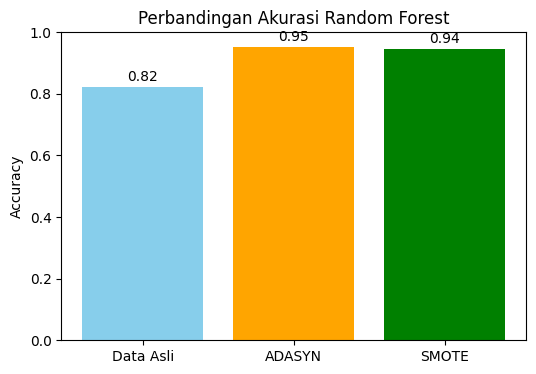

In [212]:
acc_asli_rf = accuracy_score(y_test1, y_pred1)      
acc_adasyn_rf = accuracy_score(y_test_adasyn1, y_pred_adasyn1)   
acc_smote_rf = accuracy_score(y_test_smote1, y_pred_smote1) 

# --- Simpan dalam dict ---
akurasi = {
    "Data Asli": acc_asli_rf,
    "ADASYN": acc_adasyn_rf,
    "SMOTE": acc_smote_rf
    
}

# --- Visualisasi diagram batang ---
plt.figure(figsize=(6,4))
plt.bar(akurasi.keys(), akurasi.values(), color=['skyblue','orange','green'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.0)
plt.title("Perbandingan Akurasi Random Forest")
for i, v in enumerate(akurasi.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10) 

plt.show()